In [24]:
import tensorflow as tf 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [277]:
def rescaleframe(frame, scale = 0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

In [463]:
def centroide(image):
    length = image.shape[0]
    vec = np.linspace(0, length-1, length)
    col_signal = np.sum(image, axis=0)/255 #columna
    row_signal = np.sum(image, axis=1)/255 #fila
    Cx = np.dot(vec, col_signal) / sum(col_signal)
    Cy = np.dot(vec, row_signal) / sum(row_signal)
    return Cx, Cy

In [ ]:
def sign(img):
    img = rescaleframe(img, scale=1.5)
    img_blur = cv.blur(img, ksize=(3, 3))
    img_can = cv.Canny(img_blur, 40, 100)
    contours, lista = cv.findContours(img_can, mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_NONE)
    
    dist = []
    for con in contours:
        dist.append(np.sum(con))
    max_pos = np.argmax(dist)
    main_signal = contours[max_pos].squeeze()
    
    Cx, Cy = centroide(img)
    x, y = np.array_split(main_signal, 2, axis=1)
    mag_x = np.power(Cx-x, 2)
    mag_y = np.power(Cy-y, 2)
    mag = np.power(mag_x + mag_y, 0.5)
    return mag

In [459]:
img = x_train[163][:][:]
img = rescaleframe(img, scale=1.5)

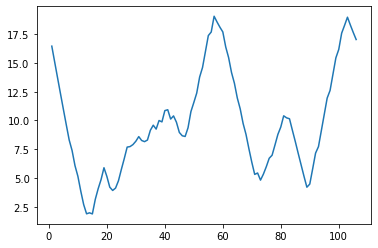

In [458]:
s = len(mag)
x = np.linspace(1, s, s)
plt.plot(x, mag)

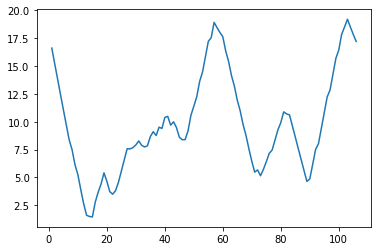

In [466]:
mag = sign(img)
s = len(mag)
x = np.linspace(1, s, s)
plt.plot(x, mag)

In [468]:
import scipy.fft as sc

In [471]:
armonics = sc.fft(mag)
len(armonics)

106

In [480]:
ang = np.angle(armonics[0])*180/np.math.pi
mag = np.linalg.norm(armonics[0])

In [494]:
mag_new = sc.ifft(armonics)

C:\Users\xmax1\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


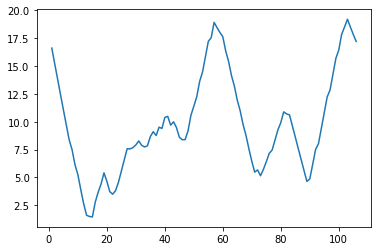

In [495]:
s = len(mag_new)
x = np.linspace(1, s, s)
plt.plot(x, mag_new)

In [496]:
w1= tf.Variable(5.)
w2=tf.Variable(8.)
b=tf.Variable(-2.)
lr = tf.Variable(0.02)

@tf.function
def y_hat(x1,x2):
    return w1*x1 + w2*x2 + b

@tf.function
def loss_function(y, x1, x2):
    return (y-y_hat(x1,x2))**2
    
def update_weight(delta_w1,delta_w2,delta_b):
    w1.assign_sub(delta_w1*lr)
    w2.assign_sub(delta_w2*lr)
    b.assign_sub(delta_b*lr)
    
X1 = [2,1,3,-1,-3,1,2]
X2 = [3,1,-1,1,-2,1,2]
Y = [18,10,8,6,-7,10,15]

with tf.GradientTape(persistent=True) as tape:
    print("Initially: w1="+str(w1.numpy()) + ", w2="+str(w2.numpy()) + ", b="+str(b.numpy()))
    for i in range(len(X1)):
        print("Starting iteration no. "+str(i+1)+ "..")
        y = tf.Variable(float(Y[i]))
        x1 = tf.Variable(float(X1[i]))
        x2 = tf.Variable(float(X2[i]))
        #initializing the loss function with next set of training set
        loss = loss_function(y,x1,x2)
        # finding the gradient of loss function w.r.t. w1,w2 and b
        gradients = tape.gradient(loss, [w1,w2,b])
        print("Gradient: L w.r.t w1="+str(w1.numpy()) + ", L w.r.t w2="+str(w2.numpy()) + ", L w.r.t b="+str(b.numpy()))
        update_weight(*gradients)
        print("New updated weights: w1="+str(w1.numpy()) + ", w2="+str(w2.numpy()) + ", b="+str(b.numpy()))
        print("Finished Iteration:" + str(i+1))
        print("-----------------------------")
    del tape

Initially: w1=5.0, w2=8.0, b=-2.0
Starting iteration no. 1..
Gradient: L w.r.t w1=5.0, L w.r.t w2=8.0, L w.r.t b=-2.0
New updated weights: w1=3.88, w2=6.32, b=-2.56
Finished Iteration:1
-----------------------------
Starting iteration no. 2..
Gradient: L w.r.t w1=3.88, L w.r.t w2=6.32, L w.r.t b=-2.56
New updated weights: w1=3.9744, w2=6.4144, b=-2.4656
Finished Iteration:2
-----------------------------
Starting iteration no. 3..
Gradient: L w.r.t w1=3.9744, L w.r.t w2=6.4144, L w.r.t b=-2.4656
New updated weights: w1=4.569216, w2=6.2161283, b=-2.267328
Finished Iteration:3
-----------------------------
Starting iteration no. 4..
Gradient: L w.r.t w1=4.569216, L w.r.t w2=6.2161283, L w.r.t b=-2.267328
New updated weights: w1=4.304399, w2=6.480945, b=-2.0025115
Finished Iteration:4
-----------------------------
Starting iteration no. 5..
Gradient: L w.r.t w1=4.304399, L w.r.t w2=6.480945, L w.r.t b=-2.0025115
New updated weights: w1=1.7990873, w2=4.8107376, b=-1.1674076
Finished Iterati

In [94]:
m = cv.moments(img_canny)
mx = m['m10'] / m['m00']
my = m['m01'] / m['m00']
print('x={} y={}'.format(mx, my))

x=13.598039215686274 y=14.156862745098039
